<a href="https://colab.research.google.com/github/pranavkantgaur/curves_and_surfaces/blob/master/parametric_representations/param_rep_intro_lec_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives


1.   Discuss limitations and merits of polygonal representation 
2.   Intro to explict and implicit representations
3.   Discuss limitations of explict and implict representations
3.   Intro to parametric representation:
     * Cubic polynomial vs higher degree polynomials
     * Mathematical representation
4.   Introduction to the concept of _Continuity_



## Limitations and merits of polygonal representations
* Accuracy vs Number of vertices:
  * Element size vs Accuracy:  
      * https://qr.ae/T0mM5P
  * Increase in number of elements and its effect on computation requirements:
     * https://doc.cgal.org/latest/Mesh_3/index.html#title39
        
* Difficulty in local control for interactive manipulation:
  * Moving the vertices without altering the toplogy:
    * https://link.springer.com/chapter/10.1007/978-4-431-68093-2_29
  * Mesh refinement, remeshing, local smoothing:
    * https://doc.cgal.org/latest/Polygon_mesh_processing/group__PMP__meshing__grp.html#gaa091c8368920920eed87784107d68ecf
* Ease of rendering of meshes on GPUs based on polygonal representation(especially triangle-based):
  * Preferred for realtime graphics rendering:
    * https://www.reddit.com/r/askscience/comments/1mqno3/why_can_gpus_only_render_polygonal_3d_forms/ccbrxju?utm_source=share&utm_medium=web2x


# General curve representations:
Polygonal representations are most suited for linear domains. For more realistic objects with smooth surfaces, polygonal representations are more suitable, given enough computational resources. Representations of curves are as follows:

## Explicit representation:
$y = f(x)$

### Limitations:
* How to represent objects with multiple values of $y$ for single value of $x$?
  * Circle, Ellipse, etc, by multiple curve-patches, one per y-value?
* Tedious interactive manipulation:
  * How to implement the feature of interaction/editing the curve represented in explict form?
* Not rotationally invariant:
  * How to implement rotation of the curve in explict form?  
* Curves with vertical tangents, infinite slope:
  * How to represent?

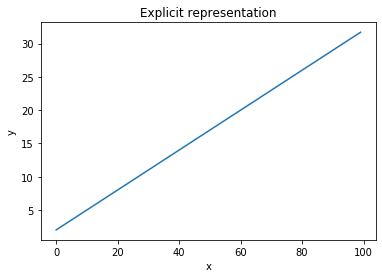

In [0]:
import matplotlib.pyplot as plt # for drawing 2D curves

# Example of explicit representation
# a straight line
class ExplicitLineRepresentation(object):
  def __init__(self, m, c): # y = mx + c
    self.m = m
    self.c = c
  def generate_points_on_representation(self, x):    
    y = self.m * x + self.c
    return y

if __name__ == '__main__' :    
  line = ExplicitLineRepresentation(0.3, 2)
  # generate list of (x, y)
  n_points = 100
  x = []
  y = []
  for i in range(n_points):
    y.append(line.generate_points_on_representation(i))
    x.append(i)
  plt.plot(x, y)     
  plt.title('Explicit representation')
  plt.ylabel('y')
  plt.xlabel('x')
  plt.show() 

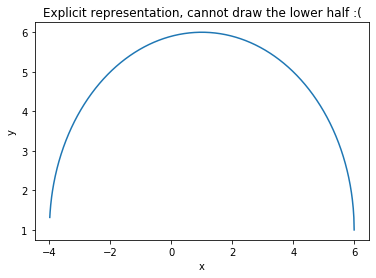

In [0]:
import math 
from numpy import arange

class ExplicitCircleRepresentation(object):
  def __init__(self, r, x, y):
    self.r  = r
    self.x = x
    self.y = y

  def getx(self):
    return self.x

  def getr(self):    
    return self.r
  
  def generate_points_on_representation(self, x):    
    assert(pow(self.r, 2) - pow(x - self.x, 2) >= 0) # avoid -ve in sqrt
    y = math.sqrt(pow(self.r, 2) - pow(x - self.x, 2)) + self.y # note only one value of y can be represented!!
    return y  

if __name__ == '__main__' :    
  circle = ExplicitCircleRepresentation(5.0, 1.0, 1.0)
  # generate list of (x, y)
  n_points = 1000
  x = [t * (circle.getx() - circle.getr()) + (1 - t) * (circle.getx() 
      + circle.getr()) for t in arange(0, 1, 1 / n_points)] # note the parametric representation!!
  y = []
  for i in x:
    y.append(circle.generate_points_on_representation(i))
  
  plt.plot(x, y)     
  plt.title('Explicit representation, cannot draw the lower half :(')
  plt.ylabel('y')
  plt.xlabel('x')
  plt.show()   

### Test your understanding:

1.   List curves which can easily be represented using _explict_ representation.
2.   Pseudocode of an algorithm to rotate curve implemented under _explict_ representation.


In [0]:
# Pseudocode for curve rotation

## Implicit representation
$f(x, y, z) = 0$
### Overview:
  * Similar computation process for coordinates as that in explicit curves.
  * Can be used to represent iso-surfaces. For instance, $f(x, y, z) = k$ implies level-$k$ for the curve. Represents set of all points $(x, y, z)$, which result in the value $k$ for the curve.
  * Examples:
    * https://github.com/mmolero/pypoisson 
      * Internally maintains a implicit function representation of input data (and associated normals) and returns samples of that function in form of vertices and faces(polygons).
    * http://hhoppe.com/poissonrecon.pdf
      * Figure 1, check the indicator function.  

### Limitations:
  * May have more solutions than required. For instance, how to represent a half-circle?
     * $x^2 + y^2 - 1 = 0, x \geq 0$
  * For two joined curved segments, it may be difficult to determine whether their tangent directions agree at their joint point:(**IMPORTANT FOR SMOOTHNESS OF CURVES**)
     * Let, $f(x, y, z) = 0$ and $g(x, y, z) = 0$:
       *  How to define their joint points? Are they the intersection points/lines?
       *  How to define tangent at those joint points?

In [0]:
# Example of implicit representation
# y - mx - c = 0
# ax + by + cz + d = 0
class ImplicitLineRepresentation(object):
  def __init__(self):
    None
  def extract_contour(self, k):    
    '''
    Returns set of points with level-k
    '''
    None 
  def compute_normal(self, x1, y1):
    '''
    computes normal at point (x1, y1)
    '''    

## Merits for explicit and implicit representations
* Easy to perform _point inside/outside_ tests:(**Clipping, etc.**)
  * Algorithm?
    * Explicit:
      * If $y_1 - f(x_1) \neq 0$ then the point $(x_1, y_1)$ does not lie on the surface:
        * https://doubleroot.in/lessons/straight-line/position-of-a-point-relative-to-a-line/
      * Based on the concept of normals:
        * https://math.stackexchange.com/a/274728/153195
    * Implicit:
      * For instance, the Indicator function in Poisson surface reconstruction algorithm.
* Normal computation is easier:(**Visibility test**)
  * Algorithm?
    * Explicit:
      * https://math.stackexchange.com/a/274728/153195:
        * vector formulation  
    * Implicit:
      * https://en.wikipedia.org/wiki/Implicit_curve#Tangent_and_normal_vector

### Test your understanding:
1. Algorithm to perform inside/outside test on explicit representation of $y = x^2$ and $x^2 + y^2 = 1$
2. Algorithm to compute normal on $y = x^2$ and $x^2 + y^2 = 1$?
3. Same as above on implicit representation.

# Parametric representation
\begin{equation*}
x = x(t)  \\
y = y(t) \\
z = z(t)
\end{equation*}
where, $0 \leq t \leq 1$

### Merits of parametric representations


*   Parametric slope is never infinite: 
    * $dy / dt$ is never infinite, even if $dy/dx$ is. Check vertical straight-line example.
*   Can easily represent multiple values of $y$ for single value of $x$.
    * Multiple $y$ may map to single $x$, since both vary independently along $t$.   
    * Check case of circle:
      * Both points with same $x$ and different $y$ will have different values of $t$, therefore can co-exist in same parametric representation.
      * $x(t) = rcos(t) + h, y(t) = rsin(t) + k$, where $r$ is radius and $(h,k)$ is the center.

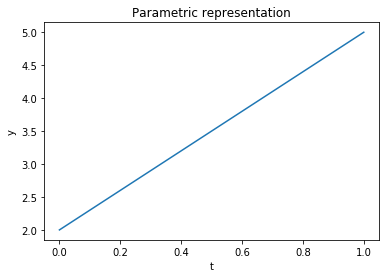

In [0]:
# Example of parametric representation
class ParametricLineRepresentation(object):
  def __init__(self, p1, p2):
    self.p1 = p1
    self.p2 = p2
  def generate_points_on_representation(self, t): # Notice the parameter 't'
    assert(0 <= t and t <= 1)
    p = self.p1 *(1 - t) + self.p2 * (t) # parametric representation of line.
    return p
 
if __name__ == '__main__' :    
  line = ParametricLineRepresentation(2, 5)
  # generate list of (x, y)
  n_points = 1000
  x = [t for t in arange(0, 1, 1 / n_points)] # note the parametric representation!!
  y = []
  for i in x:
    y.append(line.generate_points_on_representation(i))  
  plt.plot(x, y)     
  plt.title('Parametric representation')
  plt.ylabel('y')
  plt.xlabel('t')
  plt.show()      

## Cubic polynomials vs higher degree polynomials
* Lower than cubic:
  * Too little flexibility in controlling shape:
  \begin{equation*}
  Q(t) = [x(t),  y(t),  z(t)] \\
  x(t) = a_{x}t^2 + b_{x}t + c_x\\
  y(t) = a_{y}t^2 + b_{y}t + c_y\\
  z(t) = a_{z}t^2 + b_{z}t + c_z
\end{equation*}
  * Easier to compute:
    * Lower number of unknowns than cubic polynomials(9 vs 12)
* Higher than cubic:
  * Too computationally expensive(more than 12 unknowns)
  * Unwanted wiggles (due to non-linearity)
* Cubic:
  * Least degree to specify endpoints and tangent vectors, 4 coefficients.

### Cubic polynomial representation 
\begin{equation*}
  Q(t) = [x(t),  y(t),  z(t)] \\
  x(t) = a_{x}t^3 + b_{x}t^2 + c_{x}t + d_x\\
  y(t) = a_{y}t^3 + b_{y}t^2 + c_{y}t + d_y\\
  z(t) = a_{z}t^3 + b_{z}t^2 + c_{z}t + d_z
\end{equation*}

\begin{equation*}
  Q(t) = T.C \\
T = 
\begin{bmatrix}
   t^{3} & t^{2} & t^{1} & 1
\end{bmatrix}  \\
C = 
\begin{bmatrix}
  a_{x} & a_{y} & a_{z}  \\
      b_{x} & b_{y} & b_{z}  \\
      c_{x} & c_{y} & c_{z} \\
      d_{x} & d_{y} & d_{z} 
\end{bmatrix}
\end{equation*}

### A demo:
* https://www.desmos.com/calculator/ulvko52x7j
* Implcit curves:
  * https://www.geogebra.org/m/YBkweXKm
* Parameteric representation of 3D curves:
  * https://www.geogebra.org/m/D6yBZNNB  
  * https://www.geogebra.org/m/EPypmb4f


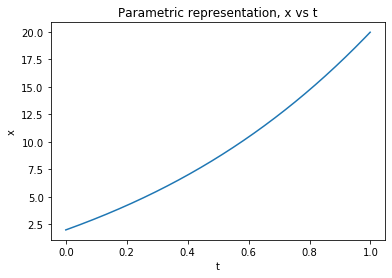

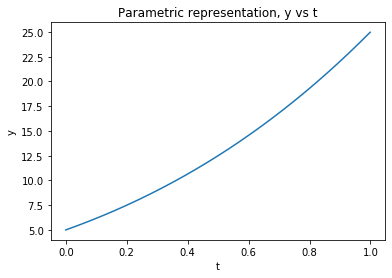

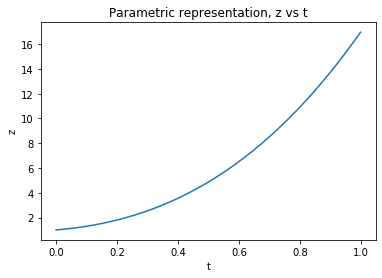

In [0]:
class CubicPolynomialParametericRepresentation(object):
  def __init__(self, coff_matrix):
    self.c = coff_matrix            

  def generate_points_on_representation(self, t): # non-vectorized implementation
    
    x = self.c[0, 0] * pow(t, 3) + self.c[1, 0] * pow(t, 2) + self.c[2,0] * pow() + self.c[3,0]
    y = self.c[0, 1] * pow(t, 3) + self.c[1, 1] * pow(t, 2) + self.c[2,1] * pow() + self.c[3,1]
    z = self.c[0, 2] * pow(t, 3) + self.c[1, 2] * pow(t, 2) + self.c[2,2] * pow() + self.c[3,2]        
    return x, y, z

  def generate_points_on_representation_vectorized(self, t):
    
    t_vector = np.array([pow(t, 3), pow(t, 2), pow(t, 1), 1])
    q = np.dot(t_vector, self.c)
    return q # 1 X 3 vector

if __name__ == '__main__' :    
  
  coff_matrix = np.array([[3, 2, 5],[5, 7, 9],[10, 11, 2], [2, 5, 1]])
  curve = CubicPolynomialParametericRepresentation(coff_matrix)
  # generate list of (x, y)  
  n_points = 1000
  x = [t for t in arange(0, 1, 1 / n_points)] 
  y = []
  for i in x:
    y.append(curve.generate_points_on_representation_vectorized(i))  
  
  xt = [y[i][0]  for i in range(n_points)]
  yt = [y[i][1]  for i in range(n_points)]
  zt = [y[i][2]  for i in range(n_points)]
  
  plt.plot(x, xt)  # xt   
  plt.title('Parametric representation, x vs t')
  plt.ylabel('x')
  plt.xlabel('t')
  plt.show()  

  plt.plot(x, yt)  # yt   
  plt.title('Parametric representation, y vs t')
  plt.ylabel('y')
  plt.xlabel('t')
  plt.show()   

  plt.plot(x, zt)  # zt   
  plt.title('Parametric representation, z vs t')
  plt.ylabel('z')
  plt.xlabel('t')
  plt.show()     


### Test your understanding


1.   WAP to generate curves for parametric representation of:
     * Straight line
     * Circle
     * Ellipse


### Tangent vector, $Q^{'}(t)$
Represents the parametric (as opposed to _geometric_) slope:
\begin{equation*}
  Q'(t) = [x'(t),  y'(t),  z'(t)] \\
  x'(t) = 3a_{x}t^2 + 2b_{x}t + c_{x}\\
  y'(t) = 3a_{y}t^2 + 2b_{y}t + c_{y}\\
  z'(t) = 3a_{z}t^2 + 2b_{z}t + c_{z}
\end{equation*}

* Demo:
  * https://www.geogebra.org/m/uTh6gAh2

In [0]:
# Implement derivative curves for the input parametric curve.

## Continuity, a measure of smoothness for curves
Intention is to create _realistic_ smooth shapes. The concept of _Continuity_ represents the notion smoothness in parametric curves. Instead of a single smooth curve, realism is often achived using _piecewise_ smooth curves or curve segments. 

*   Geometric: (Viewing curve purely as a shape)
    * Usually defined in terms of parameterization, but the choice of parameterization does not affect the outcome.
      * If a shape is represented using parameteric representations $P_1$ and $P_2$ then the if it is $G_1$ continuous in $P_1$ then it will also be the same in $P_2$.
    * $G^0$: Endpoints match
    * $G^1$: Slope of curves match in direction, not neccasarily the magnitude:
      * $TK_1 = \alpha TK_2$
    * $G^2$: Curvature of curves match
*   Parametric: (Viewing curve as a function)
    * Cannot be defined by the shape of the curve alone, it requires parameterization of the curve.
      * We cannot define parametric continuity of an explict or an implicit curve. But geometric continuity of an explict or implicit representation of a curve is a valid concept.
    * $C^0, C^1, C^2$ 
      * d${Q_{1}^n} / dt^n = d{Q_{2}^n} / dt^n$ for $C^n$.
*   There are C1 curves that are not G1:
     * **EXPLAIN, YOUR assignment!!**
     



## An example of discontinuity

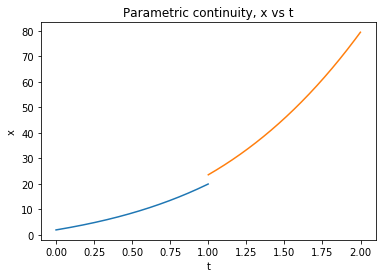

In [0]:
  coff_matrix1 = np.array([[3, 2, 5],[5, 7, 9],[10, 11, 2], [2, 5, 1]])
  curve1 = CubicPolynomialParametericRepresentation(coff_matrix1)
  coff_matrix2 = np.array([[3.9, 2.9, 5.9],[5.9, 7.9, 9.9],[10.9, 11.9, 2.9], [2.9, 5.9, 1.9]])
  curve2 = CubicPolynomialParametericRepresentation(coff_matrix2)
  # generate list of (x, y)  
  n_points = 1000
  x1 = [t for t in arange(0, 1, 1 / n_points)] 
  y1 = []
  x2 = [t for t in arange(1, 2, 1 / n_points)] 
  y2 = []
  for i in x1:
    y1.append(curve1.generate_points_on_representation_vectorized(i))  
  for i in x2:
    y2.append(curve2.generate_points_on_representation_vectorized(i))      
  
  xt1 = [y1[i][0]  for i in range(n_points)]
  xt2 = [y2[i][0]  for i in range(n_points)]
  
  
  plt.plot(x1, xt1)  # xt   
  plt.plot(x2, xt2)  # xt   
  plt.title('Parametric continuity, x vs t')
  plt.ylabel('x')
  plt.xlabel('t')
  plt.show()  


### Test your understanding:


*   Plot (first and second) gradients of a cubic polynomial curves.
*   WAP to implement a continuity estimator, given constraint matrices, $C$ as input.
*   Examples where $C^1$ does not imply $G^1$. **Bonus point if you can clearly explain it to me.**



In [0]:
# Example code to test continuity of input (parametric) curves
def determine_curve_continuity(coff_matrix1, coff_matrix2):
  '''
  parameteric:
    compute derivative from 0 to 2 of the input curve segments
    if values of the derivatives match at connecting points, set C[i] = 1
    else, exit
  geometric:
        
  '''
  None

c = determine_curve_continuity(coff_matrix1, coff_matrix2)

if (c == 0):
  print("Curves segments are not continous at boundary!!")
else:  
  for i in range(c.shape[0], 0, -1):
    if c[i] == 1:
      print("The curve segments have: C", i, "continuity!!")
    else:
      continue        